In [3]:
import pymongo as pm
import numpy as np

port = 24444
host = 'localhost'
connection = pm.MongoClient(port = port, host = host)

In [4]:
print(connection.database_names())

[u'imagenet', u'local', u'tfutils-test']


In [5]:
database = connection['imagenet']
database.collection_names()

[u'alexnet.files', u'alexnet.chunks']

In [6]:
collection = database['alexnet.files']
collection.distinct('exp_id')

[u'experiment_1']

In [9]:
query = {'exp_id': 'experiment_1'}
entries = collection.find(query)
print(entries.count())

1


In [16]:
entries[0]

{u'_id': ObjectId('59d42d671742f961665e20a4'),
 u'_saver_num_data_files': 1,
 u'_saver_write_version': 2,
 u'chunkSize': 261120,
 u'duration': 90.41816592216492,
 u'exp_id': u'experiment_1',
 u'filename': u'/home/mrowca/.tfutils/35.203.151.24:24444/imagenet/alexnet/experiment_1/checkpoint-440003.tar',
 u'length': 912128000,
 u'md5': u'a9f43e00f2e5abd206350ab85d71a307',
 u'params': {u'dont_run': False,
  u'inter_op_parallelism_threads': 40,
  u'learning_rate_params': {u'boundaries': [150000, 300000, 450000],
   u'func': {u'active_branch': u'master',
    u'active_branch_in_origin': True,
    u'clean': True,
    u'commit': u'53568fdf1a76c6fdcbb7241574700e0a35659351',
    u'commit_in_log': True,
    u'git_dir': u'/home/mrowca/workspace/cs375-private/.git',
    u'modname': u'__main__',
    u'objname': u'<lambda>',
    u'remote_urls': [u'https://github.com/neuroailab/cs375-private.git'],
    u'source_path': u'copy_imagenet.py'},
   u'values': [0.01, 0.005, 0.001, 0.0005]},
  u'load_params': 

In [14]:
query_train = {'exp_id': 'experiment_1', 'train_results': {'$exists': True}}
train_entries = collection.find(query_train)
print(train_entries.count())

1


## Actual Practice for Collections

In [80]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import pymongo as pm
import numpy as np
import tensorflow as tf

x = np.linspace(-2,2,101)[np.random.RandomState(0).permutation(101)]
y = x**3 - 1

In [63]:
database = connection['tasks']
col1 = connection['tasks']['polyfunction']
for i,j in zip(x,y):
    col1.insert_one({'x': i, 'y': j})

In [113]:
db_sorted = list(col1.find().sort([('x', pm.DESCENDING),('y', pm.ASCENDING)]))
print([i['x'] for i in db_sorted])

[2.0, 1.96, 1.92, 1.88, 1.8399999999999999, 1.8000000000000003, 1.7600000000000002, 1.7200000000000002, 1.6800000000000002, 1.6400000000000001, 1.6, 1.56, 1.52, 1.48, 1.44, 1.4, 1.3599999999999999, 1.3200000000000003, 1.2800000000000002, 1.2400000000000002, 1.2000000000000002, 1.1600000000000001, 1.12, 1.08, 1.04, 1.0, 0.96, 0.9199999999999999, 0.8799999999999999, 0.8399999999999999, 0.8000000000000003, 0.7600000000000002, 0.7200000000000002, 0.6800000000000002, 0.6400000000000001, 0.6000000000000001, 0.56, 0.52, 0.48, 0.43999999999999995, 0.3999999999999999, 0.3599999999999999, 0.31999999999999984, 0.28000000000000025, 0.2400000000000002, 0.20000000000000018, 0.16000000000000014, 0.1200000000000001, 0.08000000000000007, 0.040000000000000036, 0.0, -0.040000000000000036, -0.08000000000000007, -0.11999999999999988, -0.15999999999999992, -0.19999999999999996, -0.24, -0.28, -0.32000000000000006, -0.3599999999999999, -0.3999999999999999, -0.43999999999999995, -0.48, -0.52, -0.56, -0.5999999

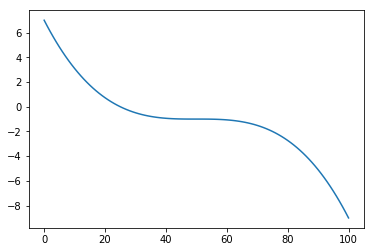

In [114]:
plt.plot(([i['y'] for i in db_sorted]))

In [ ]:
#col1.delete_one....
connection['tasks'].drop_collection['polyfunctional']

## Tensforflow 

In [119]:
import tensorflow as tf
import numpy as np

# input placeholder
input_placeholder = tf.placeholder(tf.float32, shape=[None, 3])
# trainable variables randomly initialized
W1 = tf.Variable(tf.random_normal(shape=[3,20]), tf.float32)
b1 = tf.Variable(tf.random_normal(shape=[20,]), tf.float32)
W2 = tf.Variable(tf.random_normal(shape=[20,3]), tf.float32)
b2 = tf.Variable(tf.random_normal(shape=[3,]), tf.float32)
# hidden layer
h = tf.nn.sigmoid(tf.matmul(input_placeholder, W1) + b1)
# output
out = tf.matmul(h, W2) + b2